<b><em><center>Project</center></em><b>
    <h1><b><center>The Alternative 2021 Olympic Games Medal Table</center></b><h1>

<img src="https://www.grunge.com/img/gallery/what-do-the-olympic-rings-actually-stand-for/intro-1624376933.webp" alt="Olympic logo" width="500" height="350" > 

<h2>|| 1 Research Problem<h2>

<h3> | 1.1 Debates Around the Olympic Ranking System <h3>

In a 24 August 2008 news conference, the International Olympic Committee (IOC) President Jacques Rogge confirmed that the IOC does not have a view on any particular ranking system. Despite that, it is rather common in the media to leverage the total medal count, particularly gold, to rank the teams.<br>

This unofficial ranking method is prevalent among the general public that is not concerned with the nuances of the Olympic awarding system. This is unfair for small countries with, obviously, fewer athletes and smaller economies.<br>

The 1930 Olympic charter declared that "In the Olympic Games there is no classification according to points". It stated that the country-based organisation of teams is "chiefly for practical convenience" and that country rankings are "a grave injustice on the smaller countries". <br>

By ranking the teams the conventional (unofficial) way, smaller nations get overlooked and their performance underestimated. The large economies, on the other hand, keep an almost fixed place in the rank throughout the years. Nevertheless, a few statisticians from the UK worked out and implemented an alternative, fairer ranking system that takes into account the size and the prosperity of the countries.<br>

In a 2012 The Guardian article, an alternative medal table was presented. The teams were reranked based on the team size, the GDP and the size of the population of their countries. In essence, the total medal number for each country was multiplied by a coefficient to either “reward” or “penalise” a team according to its nation’s economy or population size.<br>

Although some countries like, for example, Russia, still kept a high position in the table, the medal table had changed drastically in favour of the smaller countries.<br>


<h3> | 1.2 Project objectives <h3>

We will try to use a similar approach to that used by the statisticians for the 2012 Olympic games to create a "fair", alternative medal table for the Olympic games 2021.<br><br>
In addition to that, we will carry out an analysis of how demographic and economic factors influence Olympic performance. In particular, we will check whether there is any clear correlation between GDP per capita and athletic fitness. 


<h3>Hypothesis</h3><br>
Let us assume that a nation’s economic prosperity has a direct influence on its athletes' performance. 

<h2>|| 2 Data <h2>

For answering our questions, we will require the following datasets:
<ul>
    <li>Olympic Games 2021 results.(International Olympic Committee)</li>
    <li>Global GDP levels and population sizes for the year 2021.(International Monetary Fund)</li>
</ul>

Let us load the necessary code packages.

In [1]:
import pandas as pd

In [2]:
import matplotlib as mpl

In [3]:
import numpy as np

In [4]:
import seaborn as sns 

In [5]:
import scipy

In [6]:
from scipy import stats

First, we will load the Olympic Games 2021 result set.

In [7]:
medals21 = pd.read_excel("ol_medal.xls", header = 0, index_col =False)

And secondly, we will obtain the IMF GDP per capita dataset with historic records ranging from the years 1980 to 2026. The future 5 years are forecasted values.

In [8]:
gdp_hist = pd.read_excel("imf_gdp_mon.xls" , header = 0, index_col = False)

<h2>|| 3 Data Preparation <h2>

<b>|3.0 Functions </b>

Here, I will initialise some of my custom-built functions that I will use for analysis. The below functions will help to identify numeric outliers and inconsistencies in text values.<br>
<br>I will not describe these functions here, but rather demonstrate their implementation.

Functions for outlier and missing value detection. 

In [9]:
def nullRet(dframe, column):
    return dframe[dframe[f'{column}'].isna()]

In [10]:
def outlRet(dframe, column):
    zsc = np.abs(scipy.stats.zscore(dframe[f"{column}"]))#Z-scores for each value.
    for i in range(0,len(zsc)):
        if zsc[i] >= 3:
            print(f"Row:{i},\n",dframe.iloc[i],"\n")

In [11]:
def outlDet(dframe, field):
    zsc = np.abs(scipy.stats.zscore(dframe[f"{field}"]))#Z-scores for each value.
    count = 0 
    for i in zsc:
        if i >= 3:
            count += 1
    print(f"{field}:{count}")

In [12]:
def iniParse(dataFr, multivar =[], bivar =[]):
    classes = ["<class 'numpy.float64'>", "<class 'numpy.int64'>", "<class 'numpy.integer'>","<class 'numpy.unsigned integer'>"]
    
    print("-----Outlier count-----\n")
    
    for column in dataFr:
        if str(type(dataFr[column][1])) in classes:
            outlDet(dataFr, column)
            fig=mpl.pyplot.figure() 
            sns.boxplot(x=dataFr[column],ax=fig.add_axes([0, 0, 1.5, 1]))
            
    
    if len(multivar)!=0:
        print("\n-----Categorical value check-----\n||Multiple values\n") 
        for column in multivar:
            fig=mpl.pyplot.figure() 
            print(f"\nColumn:{column}\nValue distribution:\n",sns.boxplot(list(dataFr[f"{column}"].value_counts()),ax=fig.add_axes([0, 0, 1.5, 1])).set_title(column))
                
    if len(bivar)!=0:
        print("\n-----Categorical value check-----\n||Binary values\n")
        for column in bivar:
            print(dataFr[column].value_counts(),"\n")
    

<h3>| 3.1 Medals dataset</h3>

In [13]:
medals21.head(5)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


Although the Olympic medals dataset is pre-processed, we will nevertheless carry out a brief inspection of it.

In [14]:
medals21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


Data types are correct and no missing values detected.

Let us check for any outliers and string value errors. You will notice here boxplots for both numeric and string fields. The latter reflects the frequency distribution of the string values in the dataset; outliers on the boxplots indicate potential typing or duplication errors. For example, a value may appear too frequent, or a value appears twice where it can be entered only once.

-----Outlier count-----

Rank:0
Gold:3
Silver:3
Bronze:2
Total:3
Rank by Total:0

-----Categorical value check-----
||Multiple values


Column:Team/NOC
Value distribution:
 Text(0.5, 1.0, 'Team/NOC')


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


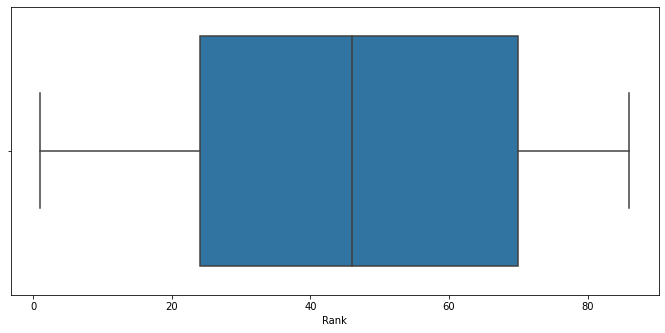

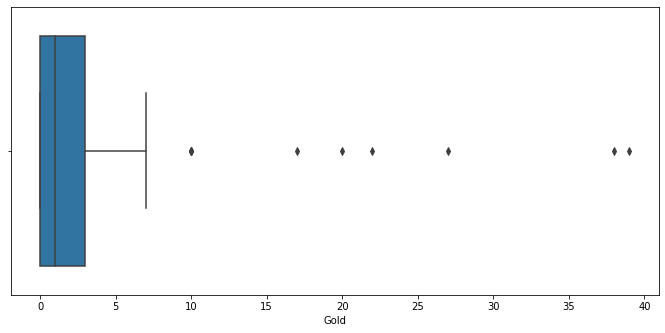

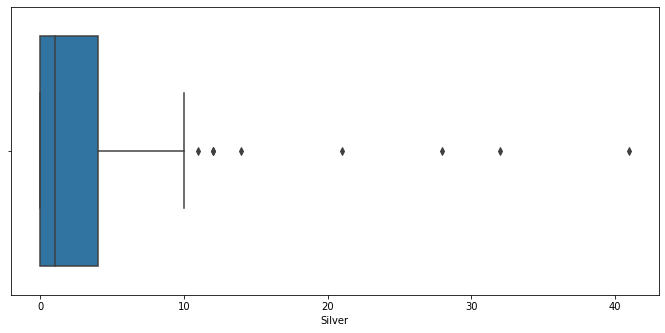

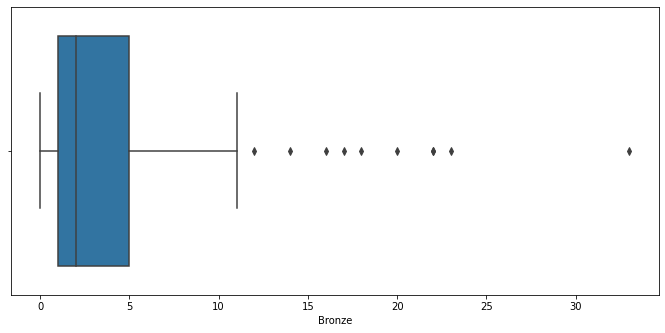

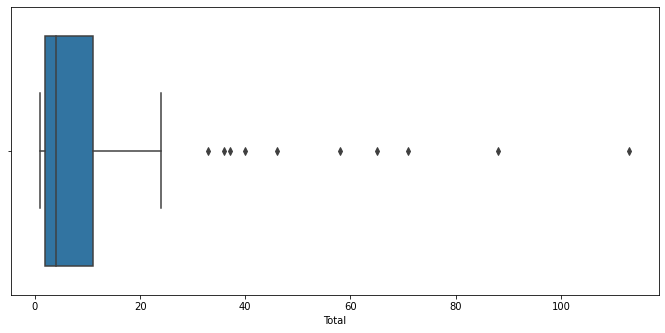

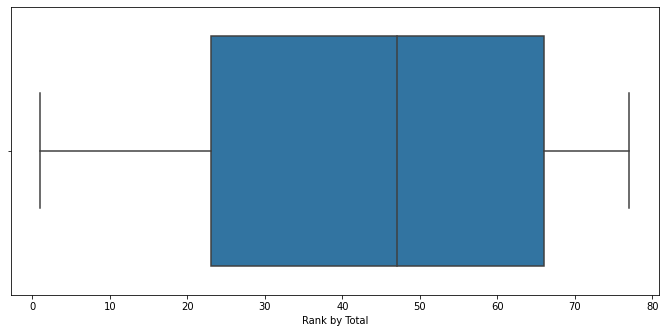

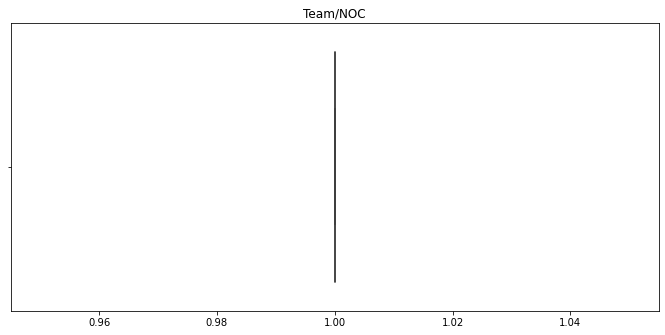

In [15]:
iniParse(medals21, multivar=["Team/NOC"])

Although there seem to be some numerical outliers in the dataset, we are aware of their cause - some Teams (US, UK, Japan, etc) scored significantly higher compared to the average result in the table. <br><br>
The boxplot above shows the value distribution in the "Team" column. The line over "1" indicates that each team was listed only once - which is correct. A different shape of the boxplot would have indicated an error (duplication).	


Hence, the medals21 dataset is ready for analysis.

<h3>| 3.2 GDP dataset </h3>

In [16]:
gdp_hist.head(5)

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2515.553,2449.860,2542.853,2390.024,2474.017,2585.022,2700.330,2802.908,2905.832,3009.579
1,Albania,2157.741,2447.005,2617.639,2692.366,2786.071,2773.464,2930.535,2920.091,2925.035,...,13088.307,13982.669,14534.109,14218.106,15225.332,16218.619,17276.354,18284.506,19327.235,20411.603
2,Algeria,4813.287,5263.191,5761.055,6109.429,6476.331,6729.559,6671.009,6614.098,6522.140,...,11644.063,11823.841,11894.859,11112.187,11432.747,11809.719,12008.996,12188.341,12366.023,12546.820
3,Angola,1223.555,1246.691,1289.604,1360.769,1455.972,1379.590,1407.950,1464.258,1566.377,...,7681.958,7478.853,7346.304,6931.862,6878.133,6991.534,7180.887,7384.959,7594.693,7791.721
4,Antigua and Barbuda,4001.414,4583.000,4918.495,5463.894,6338.636,7158.760,8285.808,9213.236,10187.195,...,20190.631,21777.631,22567.841,18618.349,18125.184,20442.328,21905.392,23359.532,24420.307,25280.748


For now, we will narrow down the observations in the GDP dataset to just the year 2021. Column "2021" will be renamed to "GDP". 

In [17]:
gdp_hist.rename(columns={2021:"GDP"}, inplace=True)

In [32]:
gdp21 = gdp_hist[["Country","GDP"]]

In [19]:
gdp21.head()

,Country,GDP
0,Afghanistan,2474.017
1,Albania,15225.332
2,Algeria,11432.747
3,Angola,6878.133
4,Antigua and Barbuda,18125.184


Below we will search for errors in the columns.

In [20]:
gdp21.dtypes

Country     object
GDP        float64
dtype: object

Data types seem to be correct. Let us check if there are any missing values.

In [21]:
gdp21['Country'].isnull().sum()

0

In [22]:
gdp21["GDP"].isnull().sum()

3

Three missing values have been found in the GDP column. Let us check, for which countries.

In [33]:
nullRet(gdp21,"GDP")

,Country,GDP


As it appears, Syria, Venezuela and Lebanon have no records in the GDP field.<br><br>
According to <a href="https://tradingeconomics.com/">tradingeconomics.com</a>, the forecasted GDP per capita values for these countries are as follows.<br><br>
Venezuela= 9500.00 USD<br>
Syria    =  870.00 USD<br>
Lebanon  = 6100.00 USD<br>
<br> Let us insert these values. 

In [36]:
gdp_hist.loc[gdp21['Country'] == "Venezuela", 'GDP'] = 9500.00

In [35]:
gdp_hist.loc[gdp21['Country'] == "Syria", 'GDP'] = 870.00
gdp_hist.loc[gdp21['Country'] == "Lebanon", 'GDP'] = 6100.00

In [37]:
display(gdp21.loc[gdp21['Country'] == "Lebanon"])
display(gdp21.loc[gdp21['Country'] == "Syria"])
display(gdp21.loc[gdp21['Country'] == "Venezuela"])

,Country,GDP
95,Lebanon,6100.0


,Country,GDP
167,Syria,870.0


,Country,GDP
189,Venezuela,9500.0


Having filled the missing values, let's have a quick analysis of the resulting dataset. 

-----Outlier count-----

GDP:5

-----Categorical value check-----
||Multiple values



C:\Users\User\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Column:Country
Value distribution:
 Text(0.5, 1.0, 'Country')


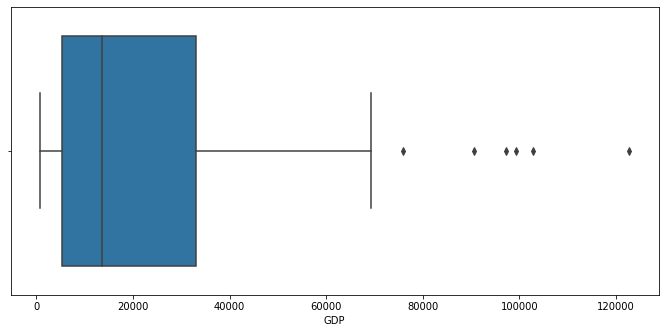

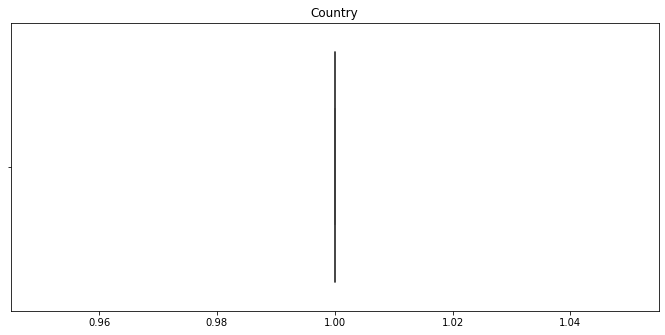

In [34]:
iniParse(gdp21, multivar = ["Country"])

Boxplot for the "Country" column suggests that there are no duplicates in it.<br><br>
Whereas there are 5 outliers in the "GDP" column. Let us inspect the rows containing outliers by calling the outlRet function that we had defined at the beginning. In this case, it should return a total of 5 rows. 

The median value of the "GDP" column.

In [28]:
gdp21["GDP"].median()

13801.1245

The list of rows with outliers.

In [29]:
outlRet(gdp21,"GDP")

These five countries, as it appeared after a search, normally top the global GDP per capita rank. The GDP values are therefore valid.<br><br>
Now, our data is clean and ready for the next steps.

<h2>|| 4 Analysis and the medal count adjustment <h2>

<h3>| 4.1 Joining the medals and GDP datasets</h3>

To successfully join the datasets, we must verify that in both of them the country titles are identical. This is quite unlikely. Therefore, we will need to make some alterations before we proceed further.

Let us create two lists with the names of the countries in both datasets.

In [38]:
medalsCountry = list(medals21["Team/NOC"])
len(medalsCountry)

93

In [39]:
gdpCountry = list(gdp21["Country"])
len(gdpCountry)

225

Below, let us join the GDP and the medals datasets and check which countries could not be matched.

In [47]:
joined = pd.merge(medals21,gdp21,how ="left",left_on="Team/NOC", right_on="Country")

To simplify filtering, we will fill all missing values with the "missing" keyword.

In [48]:
joined.fillna("missing", inplace=True)

In [42]:
display(joined.loc[joined['Country'] == "missing" ])

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,Country,GDP
0,1,United States of America,39,41,33,113,1,missing,missing
1,2,People's Republic of China,38,32,18,88,2,missing,missing
3,4,Great Britain,22,21,22,65,4,missing,missing
4,5,ROC,20,28,23,71,3,missing,missing
13,14,Cuba,7,3,5,15,18,missing,missing
15,16,Republic of Korea,6,4,10,20,13,missing,missing
26,27,Islamic Republic of Iran,3,2,2,7,33,missing,missing
33,34,Chinese Taipei,2,4,6,12,22,missing,missing
41,42,Bahamas,2,0,0,2,66,missing,missing
48,49,"Hong Kong, China",1,2,3,6,39,missing,missing


Below, we will create a list with the correct country titles and define a function for replacing the missing values.

In [43]:
def valChange(incorVals, corVals):
    for i in range (0, len(incorVals)):
        medals21.loc[medals21["Team/NOC"] == incorVals[i], "Team/NOC"] = corVals[i]
        
    

In [44]:
missVals  = list((joined.loc[joined['GDP'] == "missing" ])["Team/NOC"])

In [45]:
foundVals = ["United States","China, People's Republic of",'United Kingdom','Russian Federation',"Cuba",'Korea, Republic of',
            'Iran','Taiwan Province of China','Bahamas, The','Hong Kong SAR','Slovak Republic','Bermuda','Kyrgyz Republic',
            'North Macedonia ','Moldova','Syria']

In [46]:
valChange(missVals,foundVals)

The remaining are the countries that were not inculded in the original IMF GDP dataset. We will have to enter the details for Cuba and Bermuda manually.

In [49]:
display(joined.loc[joined['GDP'] == "missing" ])

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,Country,GDP
13,14,Cuba,7,3,5,15,18,missing,missing
62,63,Bermuda,1,0,0,1,77,missing,missing


In [50]:
joined.loc[joined["Team/NOC"] == "Cuba", "Country"] = "Cuba"
joined.loc[joined["Team/NOC"] == "Cuba", "GDP"] = 9099.00

In [51]:
joined.loc[joined["Team/NOC"] == "Bermuda", "Country"] = "Bermuda"
joined.loc[joined["Team/NOC"] == "Bermuda", "GDP"] = 117098.00

In [52]:
display(joined.loc[joined['GDP'] == "missing" ])

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,Country,GDP


In [53]:
joined.to_csv("medGdp_all.csv", index=False)

We have corrected all of the missing values in the dataset. For the convenience of use, let us export the "joined" dataframe to a new CSV file that we will load in the next chapters. 

We will also remove the "Rank", "Rank by Total" and the "Country" columns.

In [73]:
temp = joined.drop(["Country","Rank","Rank by Total"], axis=1, inplace = False)

In [74]:
temp.to_csv("medGdp_ol21.csv", index = False)

<h3>| 4.2 Identifying correlations in the dataset</h3>


Before moving on, let us check whether a country's GDP score has any influence on its Olympic performance.<br><br>
Our initial hypothesis assumed that the Olympic performance of a team, expressed in the number of medals gained, may increase with the corresponding nation's GDP growth. To determine to what extent this is true, let us generate a scatter plot with a regression line and a correlation matrix.<br><br>
Our objective here is to identify any obvious patterns, rather than to establish the causation.


In [8]:
olJoined = pd.read_csv("medGdp_ol21.csv")

In [8]:
import matplotlib.pyplot as plt

In [9]:
x = olJoined["GDP"]
y = olJoined["Total"]

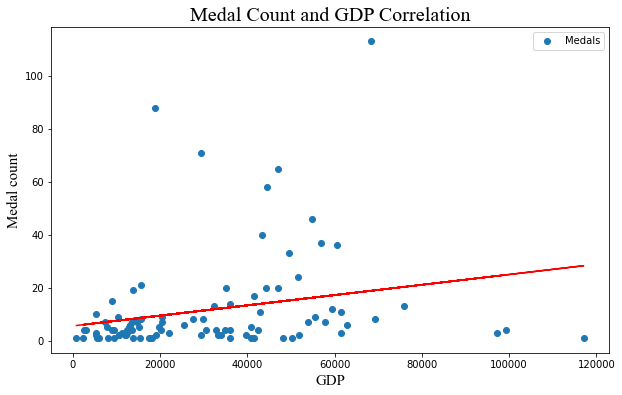

In [10]:
plt.scatter(x,y, label="Medals")

plt.title("Medal Count and GDP Correlation",fontdict={"fontname":"Times New Roman","fontsize":20})
plt.xlabel("GDP", fontdict={"fontname":"Times New Roman","fontsize":15})
plt.ylabel("Medal count", fontdict={"fontname":"Times New Roman","fontsize":15})

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")

plt.gcf().set_size_inches(10, 6)

plt.legend()
plt.show()


In [11]:
olJoined.corr(method="pearson")#Read from Left(increasing) to the right(incr.(-) or decr.(+))

,Gold,Silver,Bronze,Total,GDP
Gold,1.000000,0.929046,0.862425,0.970840,0.223821
Silver,0.929046,1.000000,0.862646,0.969439,0.195923
Bronze,0.862425,0.862646,1.000000,0.941941,0.269629
Total,0.970840,0.969439,0.941941,1.000000,0.238041
GDP,0.223821,0.195923,0.269629,0.238041,1.000000


As can be inferred from both the plot and the matrix, there is a weak relationship between the GDP score and the number of medals. This observation suggests that the GDP alone cannot predict athletic performance.

<h3>| 4.3 Adjusting the medals table</h3>

Having prepared are our dataset, we can move on to our main task - reranking the teams according to their GDP scores. 

In [7]:
fullTable = pd.read_csv("medGdp_all.csv")

First, for each team, we need to calculate an adjustment coefficient and then multiply the total medal count of each team by its corresponding coefficient. The coefficient is calculated by getting the rounded quotient of the given team’s GDP and the minimum GDP of the dataset. We then divide 1 by the resulting number to standardise the value. 

In [10]:
olJoined["Coefficient"] = (1/(olJoined["GDP"]/olJoined["GDP"].min())).round(2)

In [11]:
olJoined.head(10)

,Team/NOC,Gold,Silver,Bronze,Total,GDP,Coefficient
0,United States,39,41,33,113,68308.968,0.01
1,"China, People's Republic of",38,32,18,88,18931.083,0.05
2,Japan,27,14,17,58,44585.172,0.02
3,United Kingdom,22,21,22,65,47089.266,0.02
4,Russian Federation,20,28,23,71,29485.331,0.03
5,Australia,17,7,22,46,54891.328,0.02
6,Netherlands,10,12,14,36,60460.930,0.01
7,France,10,12,11,33,49492.134,0.02
8,Germany,10,11,16,37,56955.572,0.02
9,Italy,10,10,20,40,43375.679,0.02


Now, we can apply the coefficient to the medal count.

In [12]:
olJoined["Adj_medals"] = (olJoined["Total"]*olJoined["Coefficient"]).round(2)

In [13]:
olJoined

,Team/NOC,Gold,Silver,Bronze,Total,GDP,Coefficient,Adj_medals
0,United States,39,41,33,113,68308.968,0.01,1.13
1,"China, People's Republic of",38,32,18,88,18931.083,0.05,4.40
2,Japan,27,14,17,58,44585.172,0.02,1.16
3,United Kingdom,22,21,22,65,47089.266,0.02,1.30
4,Russian Federation,20,28,23,71,29485.331,0.03,2.13
...,...,...,...,...,...,...,...,...
88,Ghana,0,0,1,1,5967.637,0.15,0.15
89,Grenada,0,0,1,1,15385.312,0.06,0.06
90,Kuwait,0,0,1,1,41506.862,0.02,0.02
91,Moldova,0,0,1,1,13878.984,0.06,0.06


In [15]:
olJoined.sort_values("Adj_medals", ascending = False)

,Team/NOC,Gold,Silver,Bronze,Total,GDP,Coefficient,Adj_medals
1,"China, People's Republic of",38,32,18,88,18931.083,0.05,4.40
4,Russian Federation,20,28,23,71,29485.331,0.03,2.13
18,Kenya,4,4,2,10,5274.408,0.16,1.60
13,Cuba,7,3,5,15,9099.000,0.10,1.50
3,United Kingdom,22,21,22,65,47089.266,0.02,1.30
...,...,...,...,...,...,...,...,...
77,Saudi Arabia,0,1,0,1,48098.555,0.02,0.02
78,Lithuania,0,1,0,1,40784.265,0.02,0.02
76,Bahrain,0,1,0,1,50284.407,0.02,0.02
64,Puerto Rico,1,0,0,1,35942.780,0.02,0.02


As we can see, many nations, for example, Cuba, have moved quite a few positions up the rank. Nevertheless, there are teams, like the Chinese, that hold their place firmly. The latter is correct, considering that China has a moderate GDP value and at the same time a large number of medals. <br><br>

For reference, we will add to our new table the old rank column from the original table.

In [18]:
medalsRearanged = joined = pd.merge(olJoined,fullTable[["Team/NOC","Rank"]],how ="left",left_on="Team/NOC", right_on="Team/NOC")

In [26]:
sortingDf = medalsRearanged[["Team/NOC","Adj_medals"]].sort_values("Adj_medals", ascending = False)

In [30]:
sortingDf["New Rank"]=range(1,94)

In [32]:
medalsRearanged = pd.merge(medalsRearanged,sortingDf[["Team/NOC","New Rank"]],how ="left",left_on="Team/NOC", right_on="Team/NOC")

In [36]:
medalsRearanged.rename(columns={"Rank":"Old Rank"},inplace=True)

In [37]:
medalsRearanged.sort_values("Adj_medals", ascending = False)

,Team/NOC,Gold,Silver,Bronze,Total,GDP,Coefficient,Adj_medals,Old Rank,New Rank
1,"China, People's Republic of",38,32,18,88,18931.083,0.05,4.40,2,1
4,Russian Federation,20,28,23,71,29485.331,0.03,2.13,5,2
18,Kenya,4,4,2,10,5274.408,0.16,1.60,19,3
13,Cuba,7,3,5,15,9099.000,0.10,1.50,14,4
3,United Kingdom,22,21,22,65,47089.266,0.02,1.30,4,5
...,...,...,...,...,...,...,...,...,...,...
77,Saudi Arabia,0,1,0,1,48098.555,0.02,0.02,77,89
78,Lithuania,0,1,0,1,40784.265,0.02,0.02,77,90
76,Bahrain,0,1,0,1,50284.407,0.02,0.02,77,91
64,Puerto Rico,1,0,0,1,35942.780,0.02,0.02,63,92


In [38]:
medalsRearanged.to_csv("new_2021scores.csv",index=False)

<h3>||Conclusion</h3>

By adopting the approach of the statisticians who adjusted the 2012 Olympic games score table, we have created a similar table for the 2021 Olympics. As already mentioned, there are no official ranking systems in the Olympic games. The common approach is to rank higher teams that gain more medals.<br><br>
From a fairness perspective, the teams should be ranked according to the wealth and size of their nations. For now, let us leave these considerations down to the individual and provide the results of our analysis to whoever wants to view the matter from a different angle. 

